In [1]:
# necessary libraries

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from io import StringIO

In [3]:
# to load the dataset from statsmodels

df = sm.datasets.engel.load_pandas().data
df.head()

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   income   235 non-null    float64
 1   foodexp  235 non-null    float64
dtypes: float64(2)
memory usage: 3.8 KB


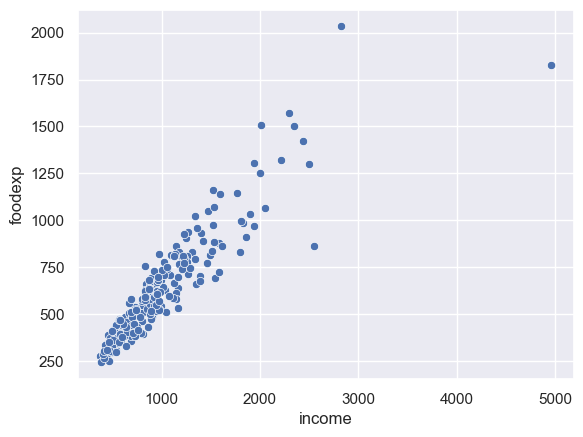

Correlation coefficient: 0.91


In [5]:
# scatterplot to show the relationship between the two variables in the dataset

sns.scatterplot(x='income', y='foodexp', data=df)
plt.show()

# there's a positive and strong correlation between the two variables

corr_coeff = round(df.income.corr(df.foodexp), 2)
print('Correlation coefficient:', corr_coeff)

>The scatterplot shows some extreme values. Even if they're far from most of the values, nevertheless they're possible values about food expenditure given the corresponding income. So, I've decided to keep those values in the dataset.

In [6]:
# to define a linear regression model with statsmodels

y = df.foodexp # dependent variable
X = df.income # independent variable
X = sm.add_constant(data=X) # to add a constant to the model for the intercept
model = sm.OLS(endog=y, exog=X)
results = model.fit()

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                foodexp   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1141.
Date:                Sat, 11 May 2024   Prob (F-statistic):           9.92e-92
Time:                        14:54:06   Log-Likelihood:                -1445.7
No. Observations:                 235   AIC:                             2895.
Df Residuals:                     233   BIC:                             2902.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.4754     15.957      9.242      0.000     116.037     178.914
income         0.4852      0.014     33.772      0.000       0.457       0.513
==============================================================================
Omnibus:                       68.110   Durbin-Watson:                   1.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              927.676
Skew:                          -0.670   Prob(JB):                    3.61e-202
Kurtosis:                      12.641   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>Since $R^2$ = 0.83, the model fits well the data.   
Furthermore, given a significance level $\alpha$ = 0.05, the coefficients for intercept and slope have p-value < $\alpha$, so that they are statistically significant and null hypothesis, according to wich there's no relationship between the two variables, is rejected.  
However, the Condition Number is very large.

In [8]:
# to extract intercept and slope coefficients

results_as_html = results.summary().tables[1].as_html()
results_df = pd.read_html(StringIO(results_as_html), header=0, index_col=0)[0]
results_df

,coef,std err,t,P>|t|,[0.025,0.975]
const,147.4754,15.957,9.242,0.0,116.037,178.914
income,0.4852,0.014,33.772,0.0,0.457,0.513


In [9]:
intercept = results_df['coef'].iloc[0]
slope = results_df['coef'].iloc[1]
print('Intercept:', intercept)
print('Slope:', slope)

Intercept: 147.4754
Slope: 0.4852


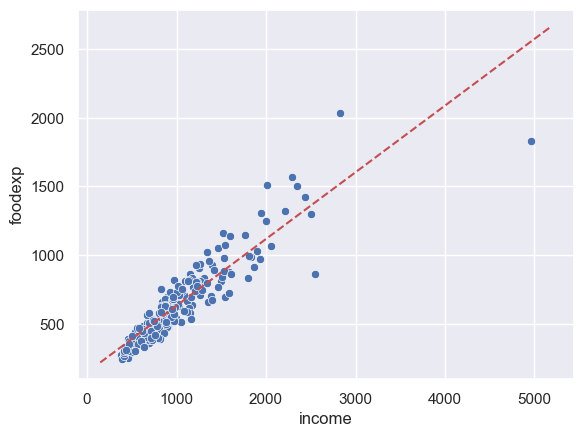

In [10]:
# to plot the values and the regression line 

sns.scatterplot(x='income', y='foodexp', data=df)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color='r')
plt.show()

In [11]:
# to predict food expenditure value given an income of 3000
# y = (1 * intercept) + (3000 * slope)

pred = results.predict(np.array([1, 3000]))[0]
print('Food expenditure prediction:', round(pred, 2), 'fr.')

Food expenditure prediction: 1603.01 fr.


In [15]:
# to define a 95% Confidence Interval of the predicted value

# low bound
const_lo = results_df['[0.025'].iloc[0]
coef_lo = results_df['[0.025'].iloc[1]
ci_lo = const_lo + (coef_lo * 3000) 

# high bound
const_hi = results_df['0.975]'].iloc[0]
coef_hi = results_df['0.975]'].iloc[1]
ci_hi = const_hi + (coef_hi * 3000)

print('Estimate:', round(pred, 2), 'fr.')
print('Confidence Interval 95%:', (ci_lo, ci_hi))

Estimate: 1603.01 fr.
Confidence Interval 95%: (1487.037, 1717.914)


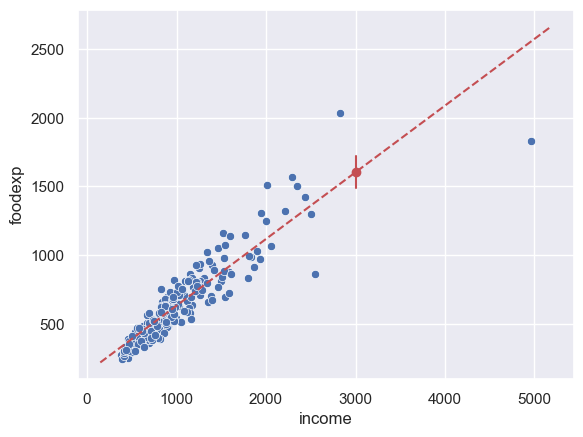

In [14]:
# to plot predicted value with C.I. on the regression line

sns.scatterplot(x='income', y='foodexp', data=df)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color='r')
plt.plot(3000, pred, 'ro')
plt.plot((3000, 3000), (ci_lo, ci_hi), color='r')
plt.show()

In [16]:
# to define another linear regression model with sklearn and the same data

y = df.foodexp
X = df.income
reg = LinearRegression().fit(X.values.reshape(-1, 1), y)
print('Intercept:', reg.intercept_)
print('Slope:', reg.coef_[0])

Intercept: 147.4753885237056
Slope: 0.4851784236769232


In [17]:
# to compare intercept and slope of the two models

(intercept, slope) == (round(reg.intercept_, 4), round(reg.coef_[0], 4))

True

In [18]:
# to compare predicted value of the two models for income = 3000

pred_sk = reg.predict(np.array([3000]).reshape(-1, 1))

round(pred, 2) == round(pred_sk[0], 2)

True